In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('trykimeedia.csv')

In [3]:
data.shape

(767, 8)

In [4]:
jaotus1 = data['Lahendi liik'].value_counts()
tabel1 = pd.DataFrame({'Otsuse liik':jaotus1.index, 'Otsused':jaotus1.values})
tabel1.to_excel("tabelid/tabel1_Pressinõukogus_tehtud_otsused.xlsx") 

In [5]:
tabel1

,Otsuse liik,Otsused
0,õigeksmõistev,417
1,tauniv,350


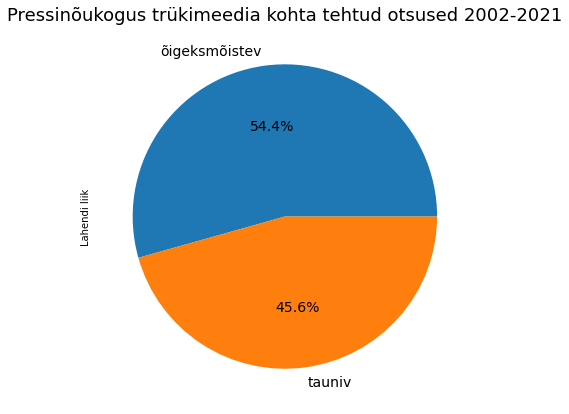

In [6]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.title("Pressinõukogus trükimeedia kohta tehtud otsused 2002-2021", size=18)
data['Lahendi liik'].value_counts().plot(ax = ax, kind='pie', fontsize=14, autopct='%1.1f%%')
plt.savefig("joonised/joonis1_Pressinõukogus_tehtud_otsused.png")
plt.show()

In [7]:
jaotus2 = data['Väljaande nimi'].value_counts(ascending = False)
tabel2 = pd.DataFrame({'Väljaande nimi':jaotus2.index, 'Otsused':jaotus2.values})
tabel2.to_excel("tabelid/tabel2_Pressinõukogus_tehtud_otsused_väljaannete_lõikes.xlsx") 

In [8]:
tabel2

,Väljaande nimi,Otsused
0,Postimees,138
1,Eesti Ekspress,95
2,Eesti Päevaleht,89
3,Delfi,85
4,Õhtuleht,68
5,Äripäev,49
6,Pärnu Postimees,20
7,Saarte Hääl,18
8,Meie Maa,17
9,Lääne Elu,16


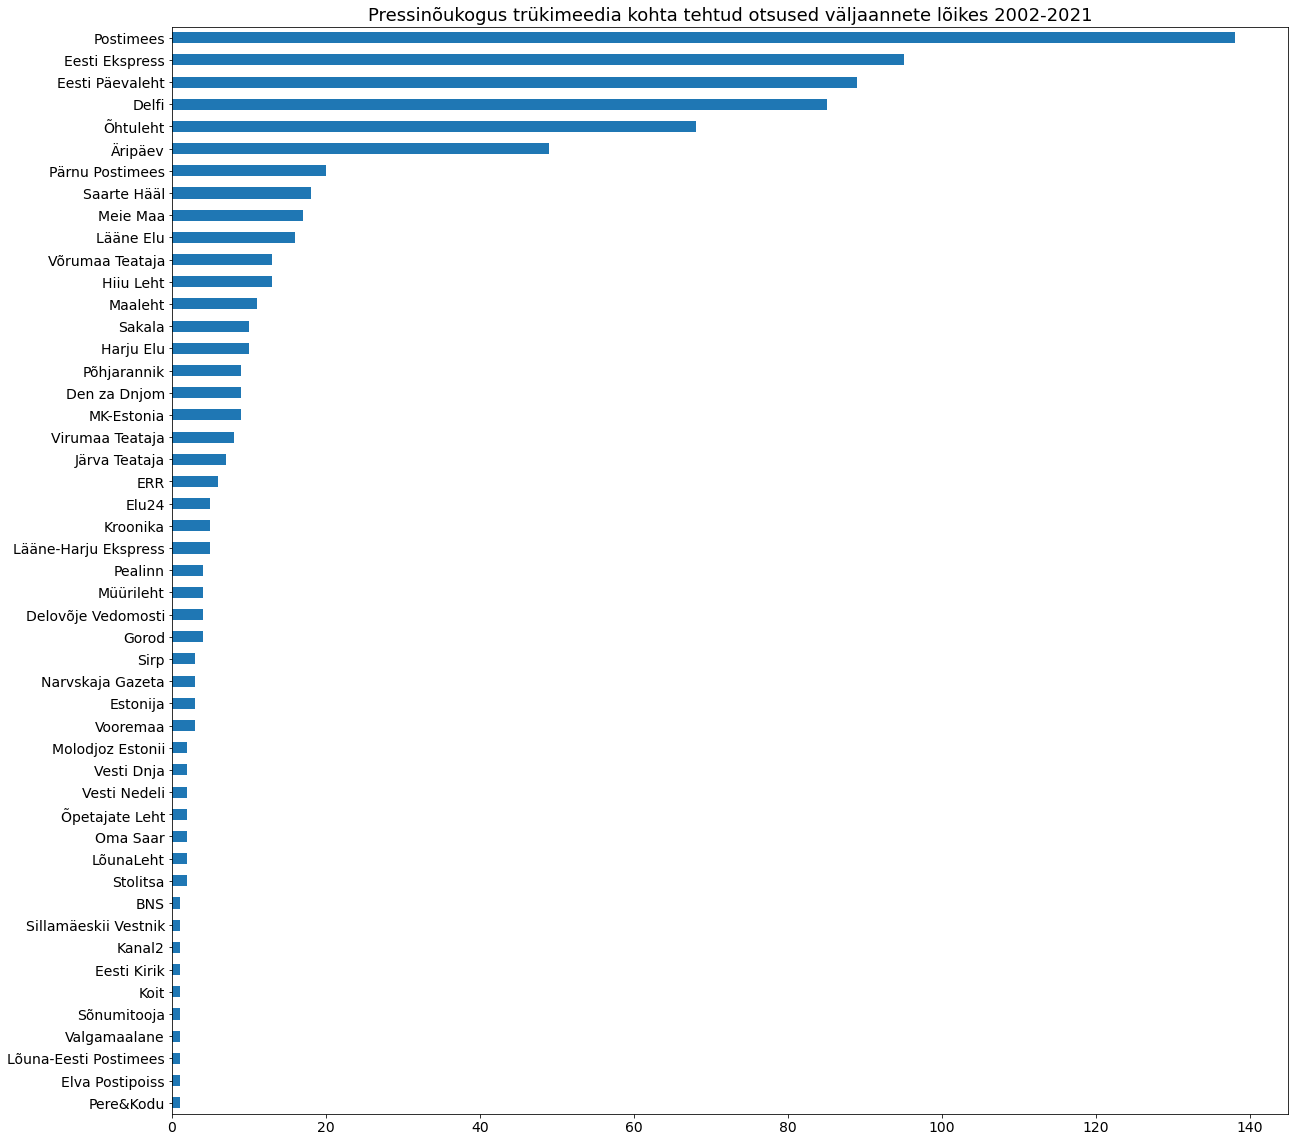

In [9]:
fig, ax = plt.subplots(figsize=(20,20))
plt.title("Pressinõukogus trükimeedia kohta tehtud otsused väljaannete lõikes 2002-2021", size=18)
data['Väljaande nimi'].value_counts(ascending = True).plot(ax=ax, kind='barh', fontsize=14)
plt.savefig("joonised/joonis2_Pressinõukogus_tehtud_otsused_väljaannete_lõikes.png")
plt.show()

In [10]:
my_crosstab = pd.crosstab(index=data["Väljaande nimi"], 
                            columns=data["Lahendi liik"],
                             margins=True)   # Include row and column totals
my_crosstab.columns = ["tauniv" , "õigeksmõistev" ,"kokku"]
my_crosstab1 = my_crosstab.drop('All', axis=0)
my_crosstab1['tauniv, %'] = round((my_crosstab1['tauniv'] / 
                      my_crosstab1['kokku'] )* 100, 1)
my_crosstab1['õigeksmõistev, %'] = round((my_crosstab1['õigeksmõistev'] / 
                      my_crosstab1['kokku']) * 100, 1)
tabel3 = my_crosstab1.sort_values(by=['kokku'], ascending=False)
tabel3.to_excel("tabelid/tabel3_Pressinõukogus_tehtud_otsuste_jaotus_väljaannete_lõikes.xlsx") 

In [11]:
tabel3

,tauniv,õigeksmõistev,kokku,"tauniv, %","õigeksmõistev, %"
Väljaande nimi,,,,,
Postimees,61,77,138,44.2,55.8
Eesti Ekspress,39,56,95,41.1,58.9
Eesti Päevaleht,46,43,89,51.7,48.3
Delfi,47,38,85,55.3,44.7
Õhtuleht,24,44,68,35.3,64.7
Äripäev,20,29,49,40.8,59.2
Pärnu Postimees,13,7,20,65.0,35.0
Saarte Hääl,5,13,18,27.8,72.2
Meie Maa,11,6,17,64.7,35.3


In [12]:
crosstb = pd.crosstab(index=data["Väljaande nimi"], 
                            columns=data["Lahendi liik"])

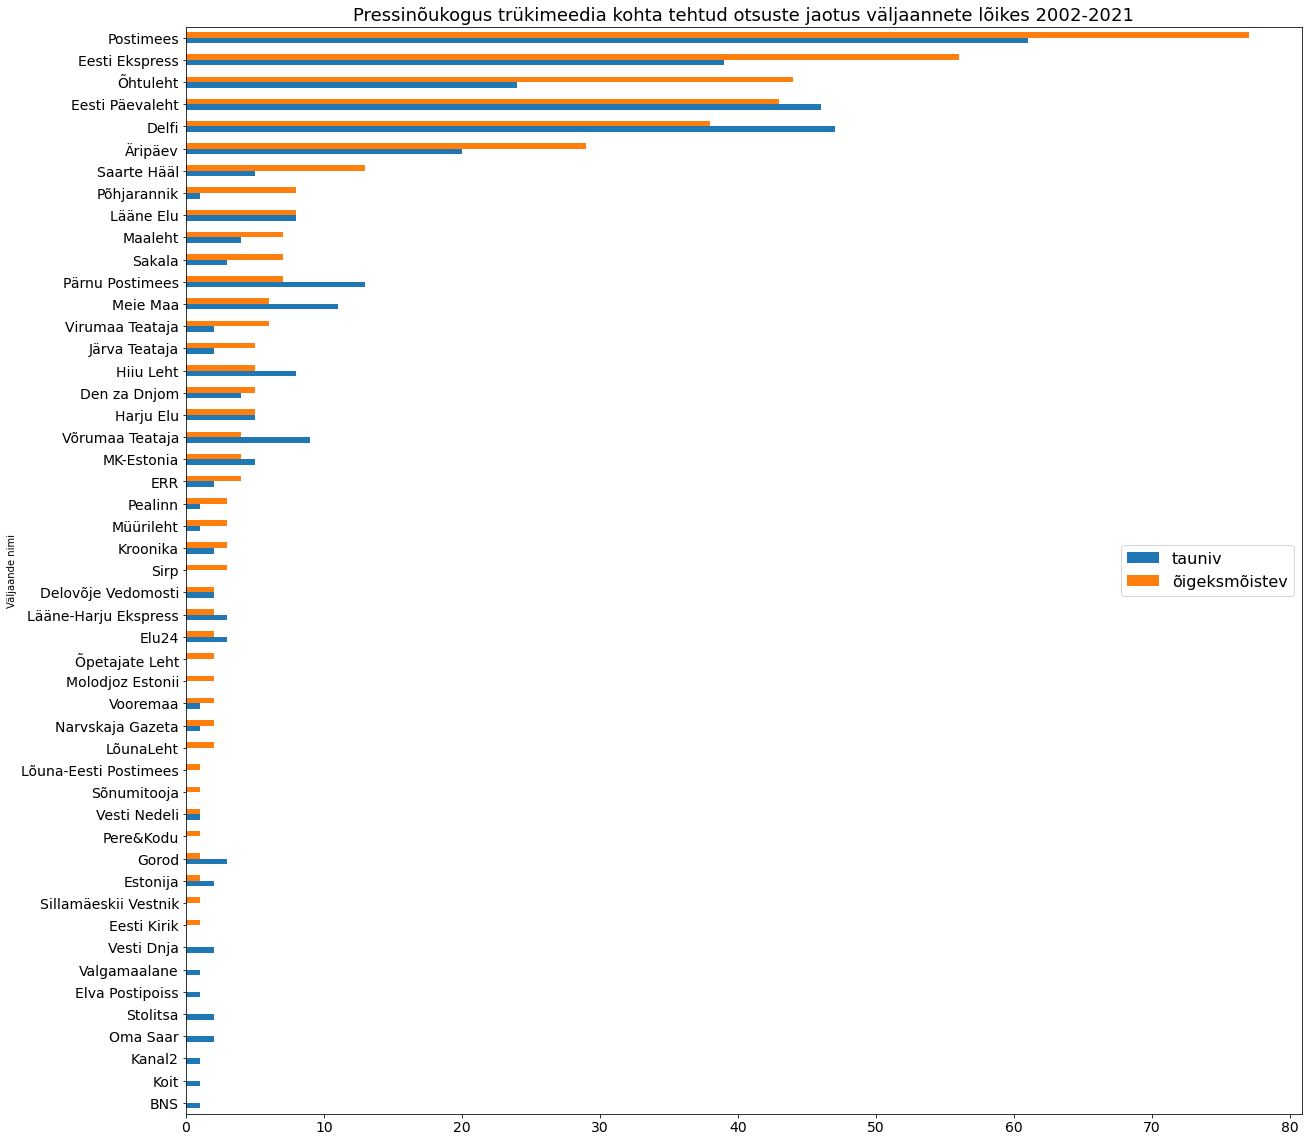

In [13]:
fig, ax = plt.subplots(figsize=(20,20))
plt.title("Pressinõukogus trükimeedia kohta tehtud otsuste jaotus väljaannete lõikes 2002-2021", size=18)
crosstb.sort_values(by='õigeksmõistev', ascending=True).plot(ax=ax, kind='barh', fontsize=14).legend(loc='center right', fontsize = 16)
plt.savefig("joonised/joonis3_Pressinõukogus_tehtud_otsuste_jaotus_väljaannete_lõikes.png")
plt.show()